<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">6. Preprocessing</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [130]:
%run Importaciones.ipynb
%run Variables_Clases.ipynb

In [137]:
display(HTML(html_h4('Realizo la importacion a un Dataframe de los datos del csv: ','blue')))
datosEEGTotal_csv = pd.read_csv('../datos/datosEEGTotal.csv', sep=';')

In [138]:
display(HTML(html_h4('Voy a rellenar los datos missing de Key con la palabra Nothing  ', 'black')))
datosEEGTotal_csv_relleno = datosEEGTotal_csv.fillna("Nothing")
display(HTML(html_h5('Imprimo la info para revisar que no falte ningún dato, ahora no hay ningun dato missing', 'blue')))
datosEEGTotal_csv_relleno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   726 non-null    int64 
 1   Attention   726 non-null    int64 
 2   Meditation  726 non-null    int64 
 3   Delta       726 non-null    int64 
 4   Theta       726 non-null    int64 
 5   LowAlpha    726 non-null    int64 
 6   HighAlpha   726 non-null    int64 
 7   LowBeta     726 non-null    int64 
 8   HighBeta    726 non-null    int64 
 9   LowGamma    726 non-null    int64 
 10  HighGamma   726 non-null    int64 
 11  Signal      726 non-null    int64 
 12  Key         726 non-null    object
dtypes: int64(12), object(1)
memory usage: 73.9+ KB


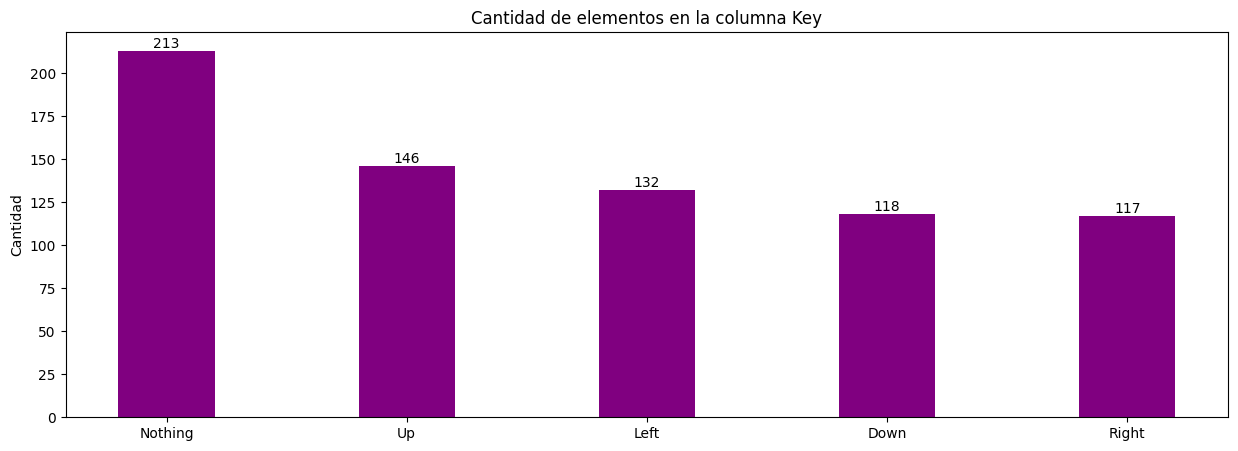

In [139]:
display(HTML(html_h4('Como se identifico en Carga de Datos, voy a modificar los datos de Key de LButton a Left  ', 'black')))

datosEEGTotal_relleno = datosEEGTotal_csv_relleno.replace({"LButton": 'Left'})

display(HTML(html_h5('Imprimo el grafico de barras para ver como estan de balanceados ahora los datos target', 'blue')))

# creo la figura 
fig = plt.figure(figsize = (15, 5))
 
# calculo la cantidad de datos de cada elemento en la columna Key
counts = datosEEGTotal_relleno['Key'].value_counts()

# creo el el barplot
plt.bar(counts.index, counts.values, color ='purple', width = 0.4)

# se muestra por cada dato el total de cada elemento
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# etiquetas para el gráfico
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos en la columna Key')

# Se muestra el gráfico
plt.show()

display(HTML(html_h5('Ahora ya se pueden orservar todos los datos y estan balanceados, Ya no aparece LButton que se ha integrado en Left y Nothing seria no ver o pulsar hacia ninguna direccion', 'blue')))



In [146]:
display(HTML(html_h4('Elimino columna Signal tal y como se observo en Carga de Datos  ', 'black')))

datosEEGTotal_sinsignal = datosEEGTotal_relleno.drop(['Signal'],axis=1)
datosEEGTotal_sinsignal.columns

display(HTML(html_h5('Se observa que ya no esta la caracteristica Signal', 'blue')))

Index(['Timestamp', 'Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha',
       'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma', 'Key'],
      dtype='object')


In [152]:
display(HTML(html_h4('Voy a normalizar con MinMaX scaler los datos del conjunto de datos excepto de timestamp y de Key porque son datos que no deben modificarse para un correcto analisis  ', 'black')))
columnas = ['Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha', 'HighAlpha', 'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma']

datos_a_normalizar = datosEEGTotal_sinsignal[columnas]

#datosEEGTotal_clean = datosEEGTotal_sinsignal.drop(['Timestamp', 'Key'], axis=1)
datosEEGTotal_datos_a_normalizar = pd.DataFrame(MinMaxScaler().fit_transform(datos_a_normalizar), columns=columnas)
datosEEGTotal_minmax = pd.concat([datosEEGTotal_sinsignal['Timestamp'],datosEEGTotal_minmax1, datosEEGTotal_sinsignal['Key']], axis=1)


print('Sin normalizar:')
display(datosEEGTotal_sinsignal.head())
print('Normalizado:')
display(datosEEGTotal_minmax.head())


display(HTML(html_h5('El antes y despues de la normalizacion de los datos', 'blue')))

Sin normalizar:


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,84,48,25253,14225,3441,4172,1881,9630,6863,5745,Left
1,55056,78,60,4946,5021,8879,13002,879,6367,4314,3150,Nothing
2,56038,66,75,102896,14838,12817,8565,2890,14525,9144,23072,Nothing
3,57043,61,87,57763,12541,6173,5120,3238,10192,9048,6663,Nothing
4,58203,37,84,21560,74162,11297,9217,4844,1945,2644,1678,Nothing


Normalizado:


,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,0.838384,0.474747,0.009006,0.011185,0.006130,0.006843,0.001222,0.030424,0.039161,0.036669,Left
1,55056,0.777778,0.595960,0.001631,0.003823,0.016003,0.021995,0.000523,0.019995,0.024421,0.019984,Nothing
2,56038,0.656566,0.747475,0.037205,0.011676,0.023153,0.014381,0.001926,0.046070,0.052352,0.148078,Nothing
3,57043,0.606061,0.868687,0.020813,0.009838,0.011090,0.008470,0.002168,0.032221,0.051796,0.042572,Nothing
4,58203,0.363636,0.838384,0.007665,0.059127,0.020394,0.015500,0.003289,0.005862,0.014763,0.010519,Nothing


In [155]:
datosEEGTotal_minmax['Key'] = datosEEGTotal_minmax['Key'].replace(LABELS)

In [158]:
datosEEGTotal_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   726 non-null    int64  
 1   Attention   726 non-null    float64
 2   Meditation  726 non-null    float64
 3   Delta       726 non-null    float64
 4   Theta       726 non-null    float64
 5   LowAlpha    726 non-null    float64
 6   HighAlpha   726 non-null    float64
 7   LowBeta     726 non-null    float64
 8   HighBeta    726 non-null    float64
 9   LowGamma    726 non-null    float64
 10  HighGamma   726 non-null    float64
 11  Key         726 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 68.2+ KB


In [161]:
datosEEGTotal_minmax['Key'] = datosEEGTotal_minmax['Key'].astype('int64')
datosEEGTotal_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   726 non-null    int64  
 1   Attention   726 non-null    float64
 2   Meditation  726 non-null    float64
 3   Delta       726 non-null    float64
 4   Theta       726 non-null    float64
 5   LowAlpha    726 non-null    float64
 6   HighAlpha   726 non-null    float64
 7   LowBeta     726 non-null    float64
 8   HighBeta    726 non-null    float64
 9   LowGamma    726 non-null    float64
 10  HighGamma   726 non-null    float64
 11  Key         726 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 68.2 KB


In [162]:
exp_outliners = []

   
# Calculo el z-score para cada valor en el DataFrame
z_scores = stats.zscore(datosEEGTotal_minmax)

# Defino un umbral para los z-scores que considerará como outliers
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
umbral_zscore = 3

# Detecto los outliers basados en el z-score (valores cuyo valor absoluto de z-score es mayor que el umbral)
outliers = (abs(z_scores) > umbral_zscore)

# Cuento el número de outliers en cada columna
num_outliers_por_columna = outliers.sum(axis=0)

# Obtengo las filas y sus índices que son outliers en cada columna
outliers_por_columna = {}
for column in datosEEGTotal_minmax.columns:
    outliers_index = outliers[outliers[column]].index
    outliers_por_columna[column] = outliers_index

# Imprimir el número de outliers por cada columna
print("Número de outliers por columna:")
print(num_outliers_por_columna)

# Lista para almacenar todos los índices de outliers
todos_indices_outliers = []

# Almacenar todos los índices de outliers en una lista
for indices in outliers_por_columna.values():
    todos_indices_outliers.extend(indices)

# Convertir la lista de índices a un conjunto para eliminar duplicados
conjunto_indices_outliers = set(todos_indices_outliers)

# Lista ordenada de los índices únicos que no se repiten
indices_unicos_ordenados = sorted(list(conjunto_indices_outliers))

# Imprimir los índices únicos ordenados
print()
print("Índices únicos de outliers ordenados:")
print(f'Total: {len(indices_unicos_ordenados)}')
print(f'Lista: {indices_unicos_ordenados}')

# Construir un nuevo DataFrame que contenga las filas correspondientes a los índices únicos ordenados
dataframe_outliers = datosEEGTotal_minmax.loc[indices_unicos_ordenados] #por si se quisiera imprimir


# Agregar el DataFrame filtrado a la lista
exp_outliners.append(indices_unicos_ordenados)


Número de outliers por columna:
Timestamp      0
Attention      0
Meditation     0
Delta         23
Theta         11
LowAlpha       8
HighAlpha      8
LowBeta        2
HighBeta       6
LowGamma       8
HighGamma      6
Key            0
dtype: int64

Índices únicos de outliers ordenados:
Total: 42
Lista: [9, 10, 23, 36, 48, 71, 72, 126, 142, 149, 169, 183, 202, 217, 227, 228, 242, 243, 247, 263, 268, 282, 283, 288, 303, 304, 313, 314, 354, 391, 414, 454, 474, 494, 515, 516, 518, 670, 678, 703, 715, 719]


In [164]:


# Itero sobre los outliners y aplicar el proceso a cada uno de ellos
for out in exp_outliners:

    datosEEGTotal_nor = datosEEGTotal_minmax.drop(out)
    #datosEEGTotal_sinsignal = datosEEGTotal_sinsignal.drop(out)
    
    datosEEGTotal_nor_sinoutliners = datosEEGTotal_nor.reset_index(drop=True)
    #datosEEGTotal_sinsignal_sinoutliners = datosEEGTotal_sinsignal.reset_index(drop=True)


In [165]:
datosEEGTotal_nor_sinoutliners

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127,0.838384,0.474747,0.009006,0.011185,0.006130,0.006843,0.001222,0.030424,0.039161,0.036669,4
1,55056,0.777778,0.595960,0.001631,0.003823,0.016003,0.021995,0.000523,0.019995,0.024421,0.019984,0
2,56038,0.656566,0.747475,0.037205,0.011676,0.023153,0.014381,0.001926,0.046070,0.052352,0.148078,0
3,57043,0.606061,0.868687,0.020813,0.009838,0.011090,0.008470,0.002168,0.032221,0.051796,0.042572,0
4,58203,0.363636,0.838384,0.007665,0.059127,0.020394,0.015500,0.003289,0.005862,0.014763,0.010519,0
...,...,...,...,...,...,...,...,...,...,...,...,...
679,348567,0.808081,0.363636,0.001319,0.010831,0.001255,0.009184,0.004872,0.077088,0.074315,0.090139,2
680,355018,0.838384,0.191919,0.001102,0.010963,0.004056,0.003204,0.002222,0.072483,0.100915,0.063809,2
681,358034,0.838384,0.373737,0.001149,0.006626,0.010091,0.011121,0.003638,0.099851,0.131535,0.080443,2
682,361108,0.828283,0.505051,0.042317,0.004178,0.002433,0.010658,0.001503,0.022613,0.030417,0.007568,2


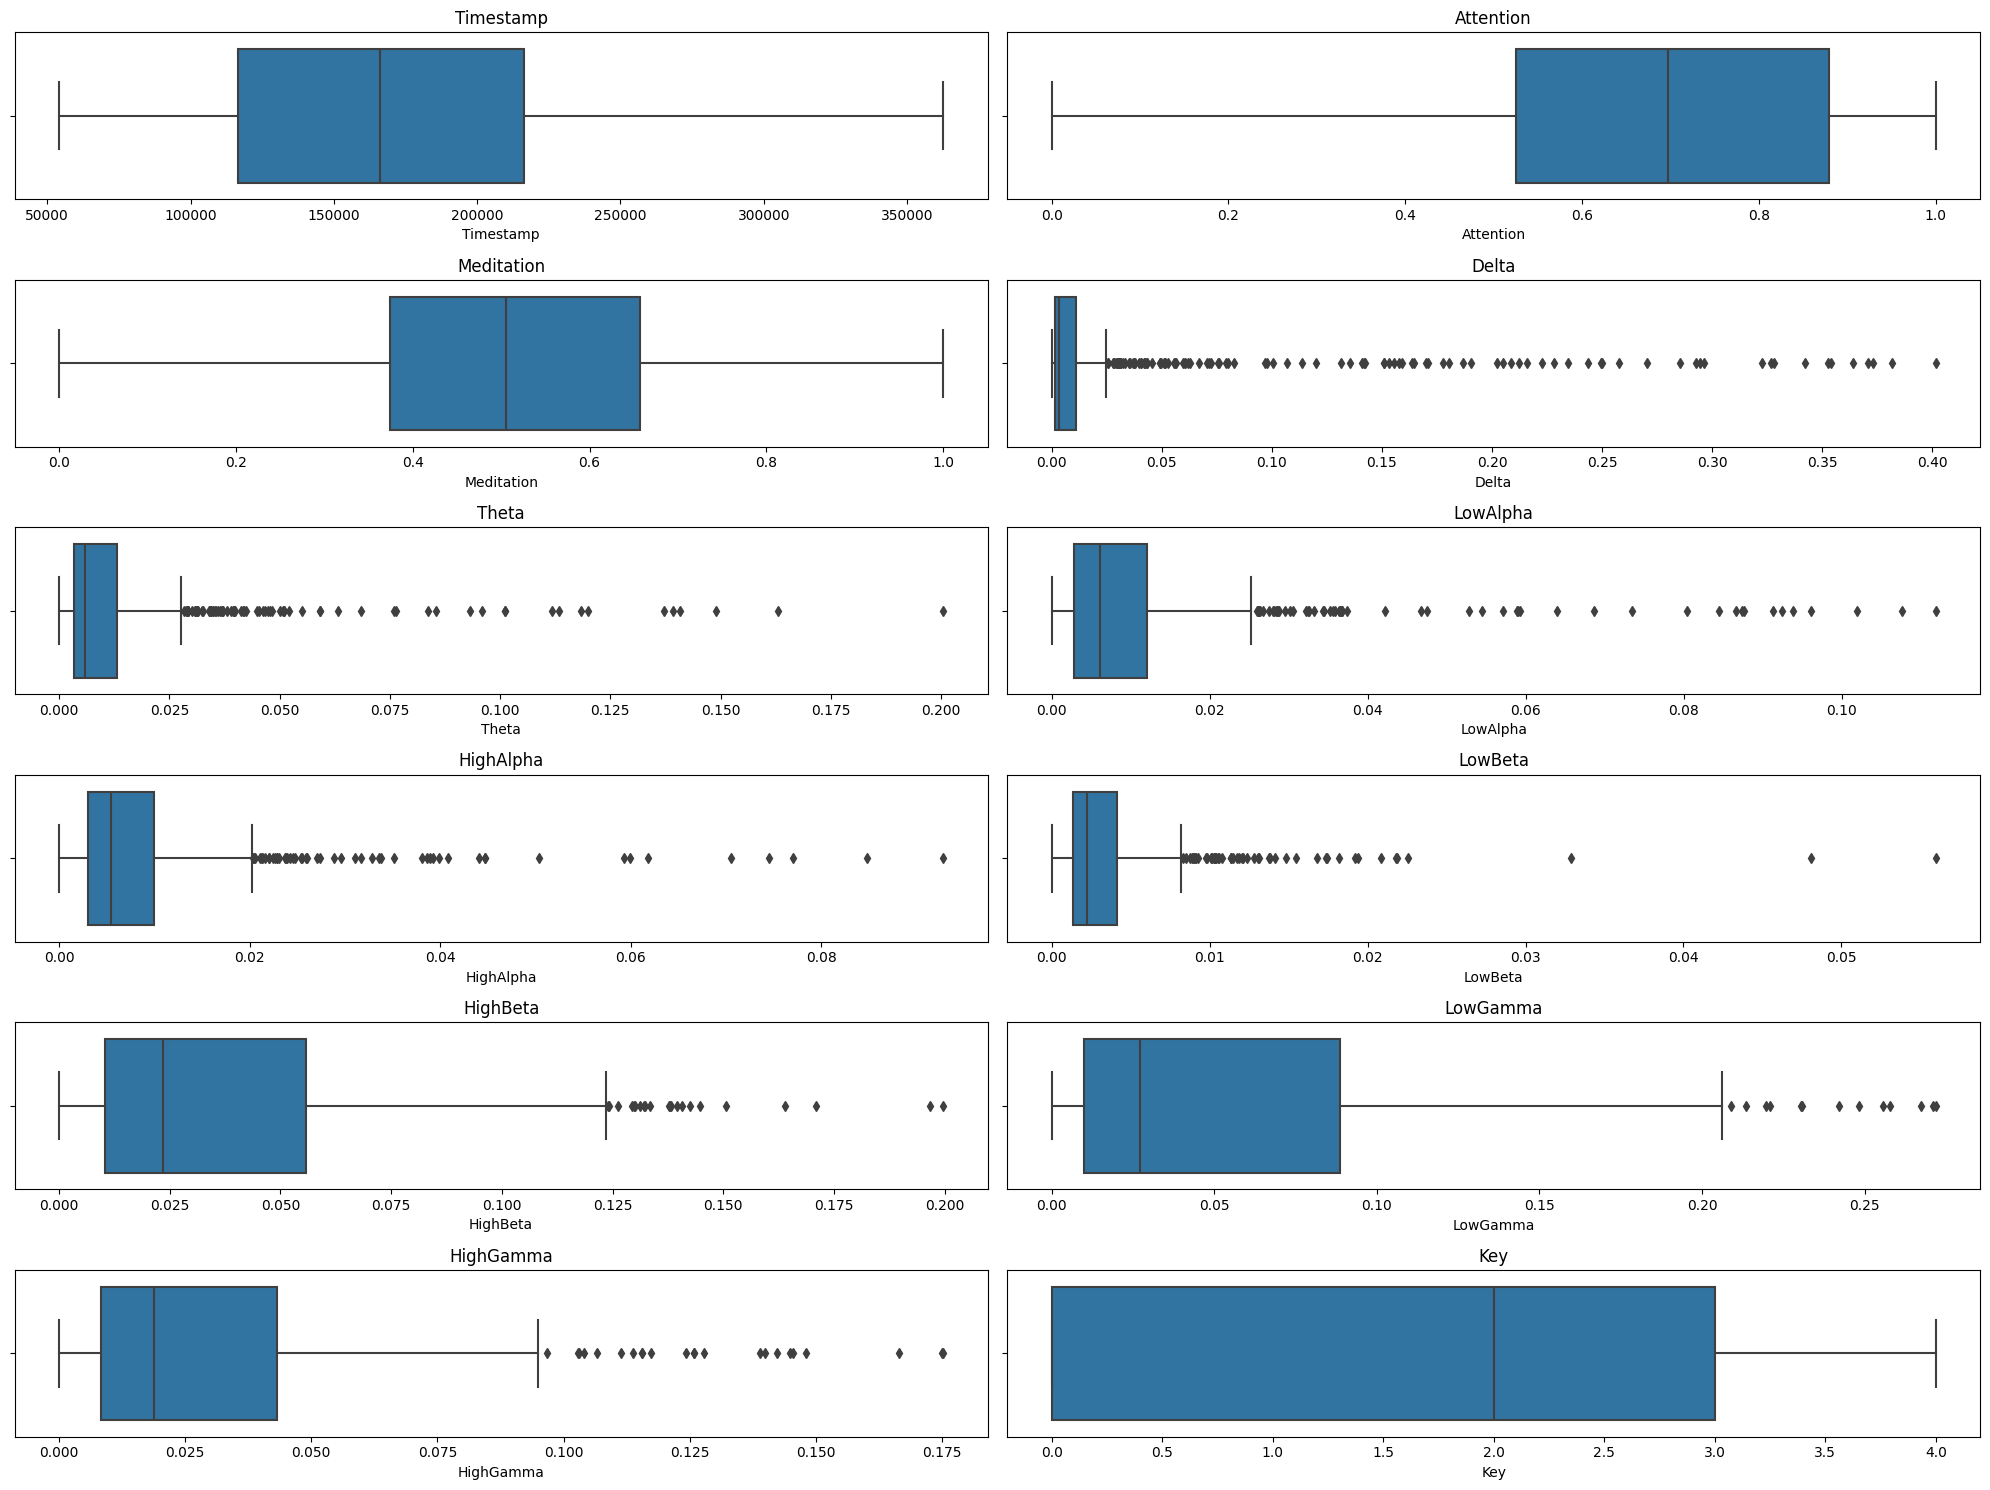

In [166]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

display(HTML(html_h4('Analizo de que manera esta la distribución de datos en su cuartil dentro de cada caracterictica del conjunto de datos  ', 'purple')))

# Filtro el DataFrame para dejar fuera la columna Key
datosEEGTotal_csv_box1 = datosEEGTotal_nor_sinoutliners

# Calculo el número de filas necesarias para mostrar dos boxplots por fila para que la impresion no sea muy larga
num_cols = len(datosEEGTotal_csv_box1.columns)
num_rows = (num_cols) // 2

# Defino el tamaño de la figura
plt.figure(figsize=(20, 15))

# Itero sobre cada columna del DataFrame filtrado
for i, column in enumerate(datosEEGTotal_csv_box1.columns):
    # Creo un subplot para cada columna
    plt.subplot(num_rows, 2, i + 1)
    
    # un boxplot para cada columna
    sns.boxplot(data=datosEEGTotal_csv_box1, x=column)
    
    # título como el nombre de la columna
    plt.title(column)

# Ajusto el diseño para evitar superposiciones
plt.tight_layout()


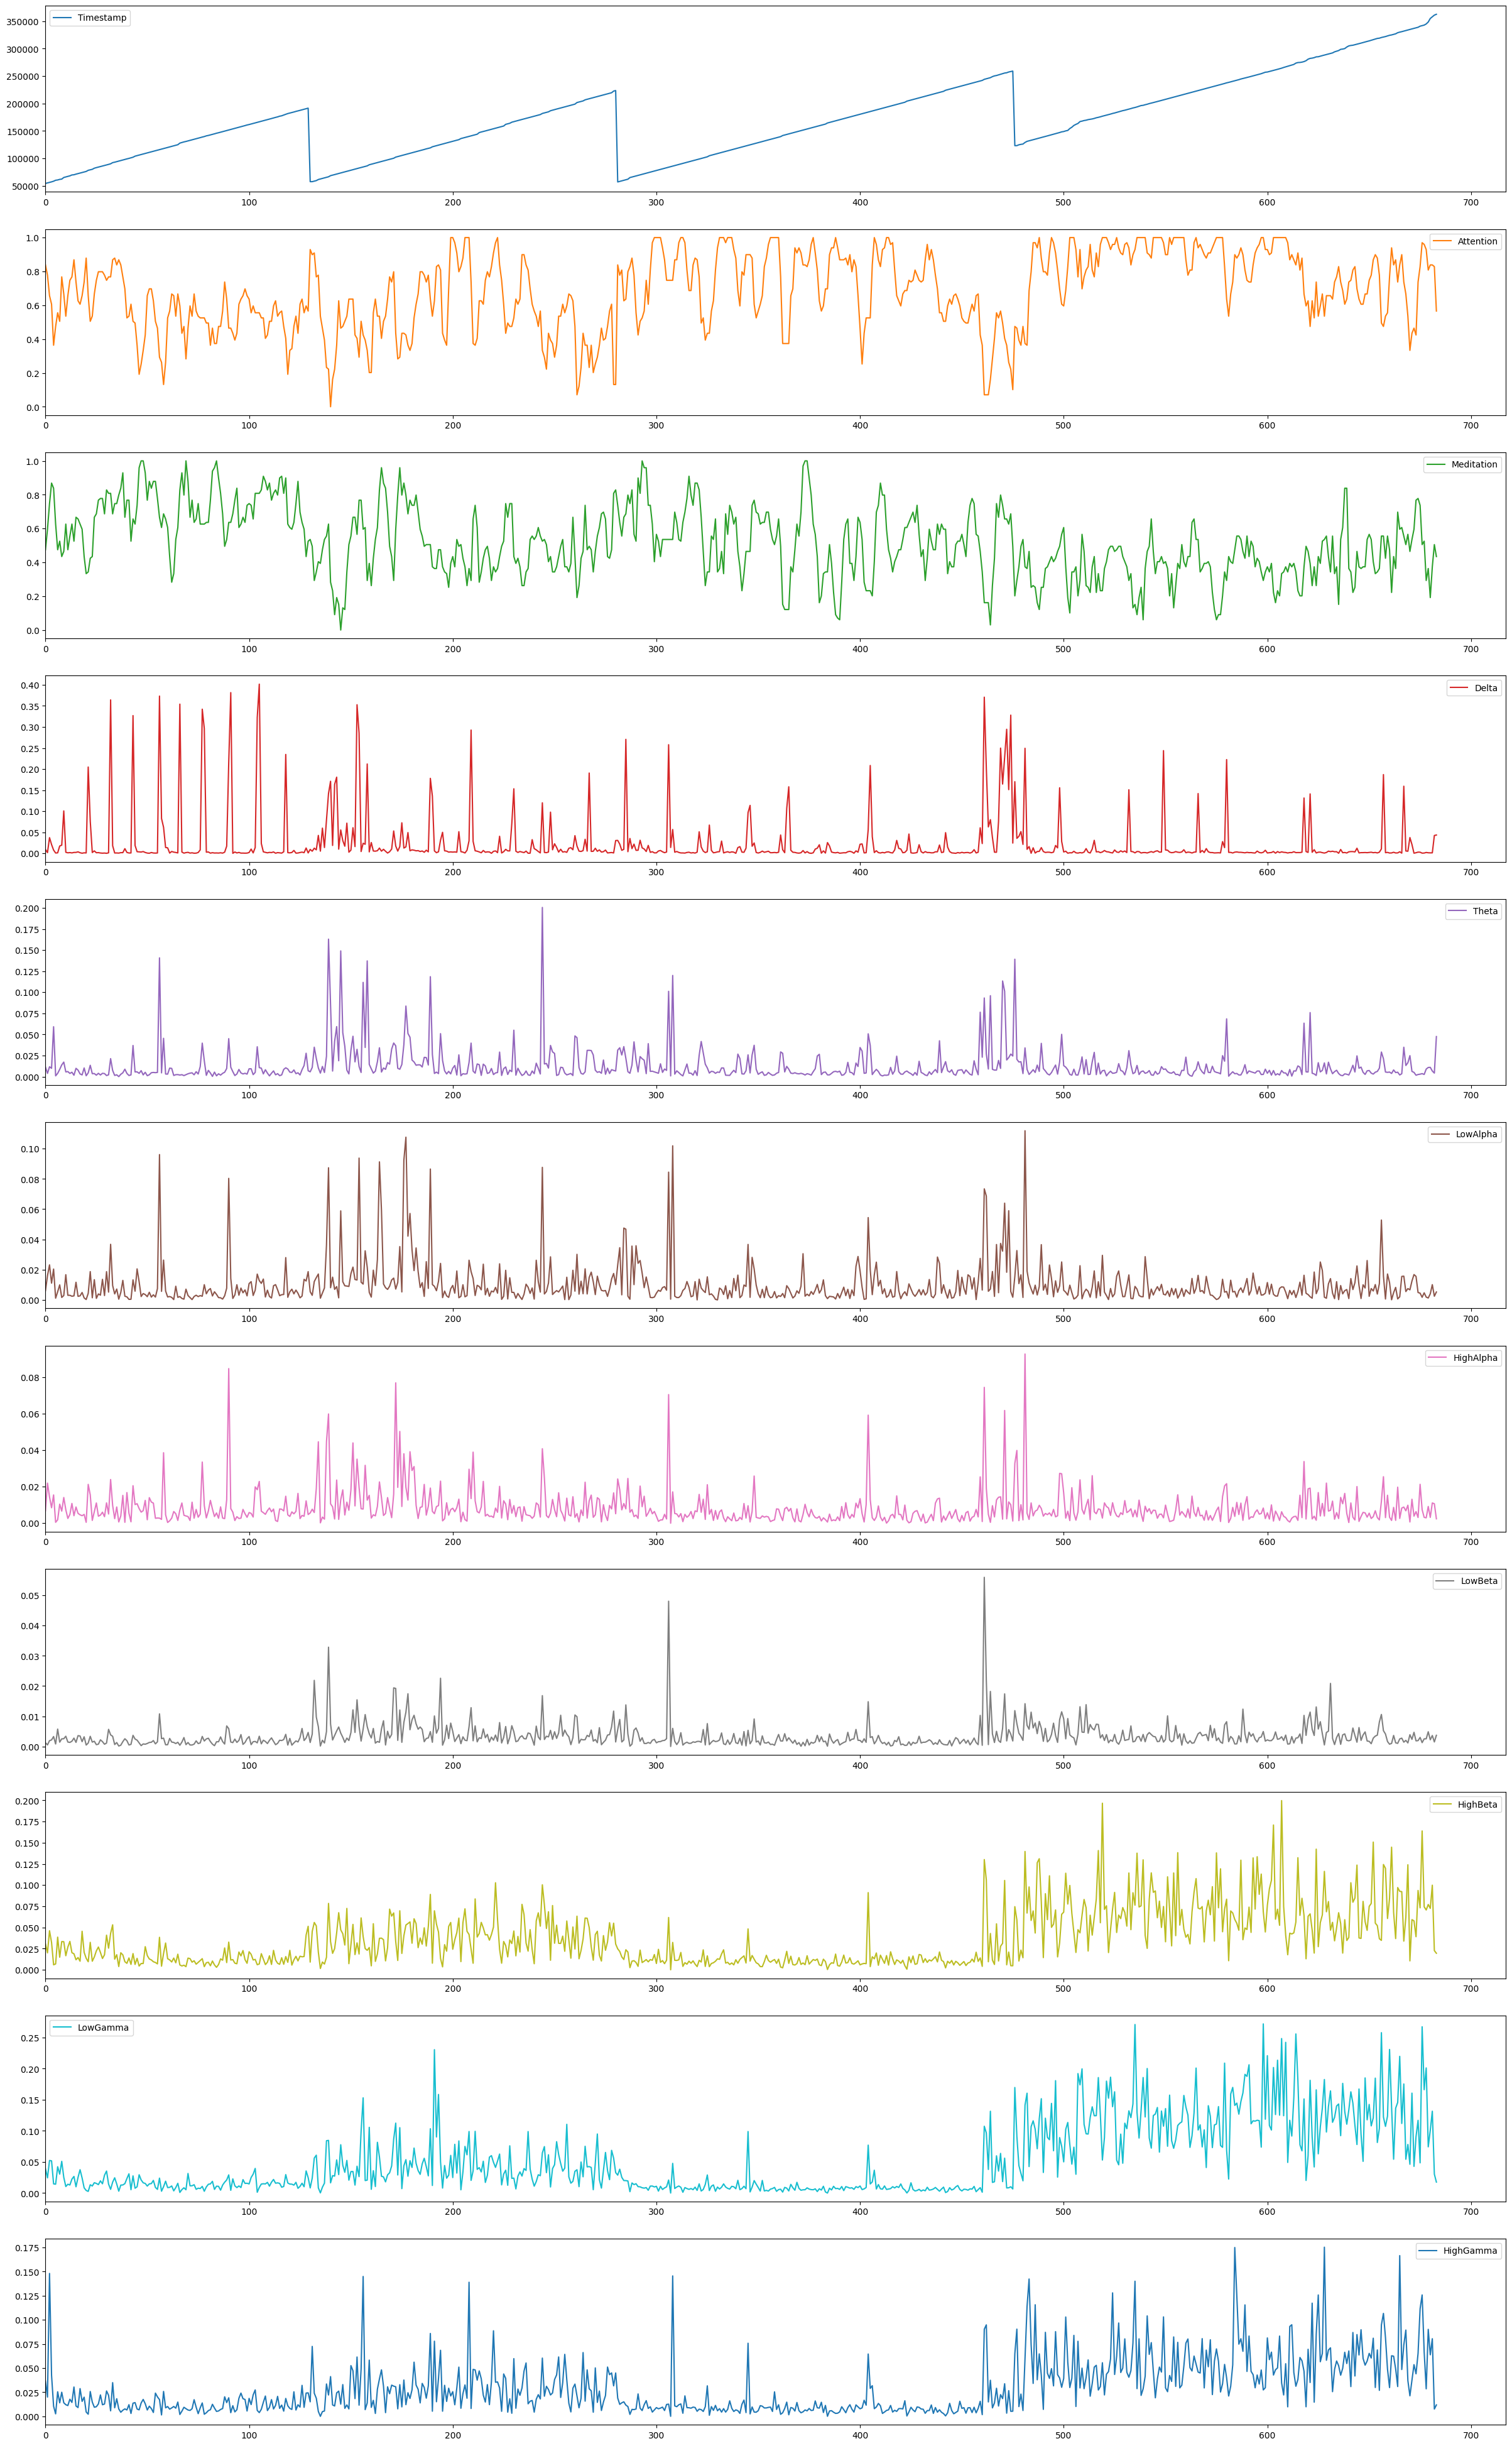

In [169]:
display()
display(HTML(html_h4('Imprimo cada una de las caracteristicas de los datos excepto Key: ', 'purple')))

#imprimo los datos por cada columna excluyendo Key
datosEEGTotal_nor_sinoutliners.drop(['Key'],axis=1).plot(kind="line",subplots=True,sharex=False, figsize=(30,50),xlim=0)
plt.show()


In [171]:
last_timestamp = None

file_counter = 1

df_segment = pd.DataFrame(columns=datosEEGTotal_nor_sinoutliners.columns)

# Itera sobre el DataFrame
for index, row in datosEEGTotal_nor_sinoutliners.iterrows():
    current_timestamp = row['Timestamp']
    
    # Si es el primer registro o si el timestamp actual es menor al anterior, crea un nuevo DataFrame y guarda el segmento anterior en un archivo
    if last_timestamp is None or current_timestamp < last_timestamp:
        if last_timestamp is not None:
            # Guarda el DataFrame anterior en un archivo
            df_segment.to_csv(f'../datos/experimento_{file_counter}.csv', index=False)
            file_counter += 1
        
        # Inicializa un nuevo DataFrame para el nuevo segmento
        df_segment = pd.DataFrame(columns=datosEEGTotal_nor_sinoutliners.columns)
    
    # Añade la fila actual al DataFrame del segmento actual
    df_segment = pd.concat([df_segment, row.to_frame().T])

    # Actualiza el timestamp anterior
    last_timestamp = current_timestamp

# Guarda el último segmento en un archivo
if not df_segment.empty:
    df_segment.to_csv(f'../datos/experimento_{file_counter}.csv', index=False)

In [174]:
datosEEGTotal_nor_all = datosEEGTotal_nor_sinoutliners.drop(['Timestamp'], axis=1)

datosEEGTotal_nor_all.to_csv(f'../datos/experimento_all.csv', index=False)

### Correlaciones ###

In [170]:
datosEEGTotal_nor_sinoutliners.corr()

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
Timestamp,1.000000,0.100334,-0.261939,-0.068801,-0.117701,-0.114436,-0.119396,-0.018146,0.409604,0.502453,0.393180,0.039375
Attention,0.100334,1.000000,-0.257575,-0.288858,-0.321439,-0.270224,-0.267780,-0.176317,0.259867,0.278214,0.172879,0.200847
Meditation,-0.261939,-0.257575,1.000000,0.014208,-0.087119,0.120941,0.091359,-0.166918,-0.401522,-0.381237,-0.287568,0.093867
Delta,-0.068801,-0.288858,0.014208,1.000000,0.478136,0.408535,0.415986,0.353764,0.010682,-0.061598,-0.017875,-0.177778
Theta,-0.117701,-0.321439,-0.087119,0.478136,1.000000,0.606032,0.466065,0.530033,0.111961,0.039144,0.095292,-0.146357
LowAlpha,-0.114436,-0.270224,0.120941,0.408535,0.606032,1.000000,0.585101,0.499567,0.146907,0.045502,0.113217,-0.128350
HighAlpha,-0.119396,-0.267780,0.091359,0.415986,0.466065,0.585101,1.000000,0.584618,0.181020,0.096414,0.132488,-0.134570
LowBeta,-0.018146,-0.176317,-0.166918,0.353764,0.530033,0.499567,0.584618,1.000000,0.290726,0.216968,0.224577,-0.129478
HighBeta,0.409604,0.259867,-0.401522,0.010682,0.111961,0.146907,0.181020,0.290726,1.000000,0.699050,0.613131,-0.008140
LowGamma,0.502453,0.278214,-0.381237,-0.061598,0.039144,0.045502,0.096414,0.216968,0.699050,1.000000,0.673069,-0.014157


In [ ]:
import seaborn as sns
sns.heatmap(experimento_1_minmax.corr(), cmap="BrBG") 

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(experimento_1_minmax.corr(),cmap='coolwarm')

plt.title('Matriz de correlación')

plt.show()

In [ ]:
matriz_correlacion = experimento_1_minmax.corr()

In [ ]:
matriz_correlacion

In [ ]:

matriz_correlacion = experimento_1_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:

matriz_correlacion = experimento_2_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:

matriz_correlacion = experimento_3_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:

matriz_correlacion = experimento_4_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:

matriz_correlacion = experimento_all_minmax.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(5).index
componentes_peores = suma_correlaciones.nsmallest(5).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:
experimento_all_minmax_1 = experimento_all_minmax.drop(['Timestamp', 'Meditation', 'Attention','LowGamma', 'HighGamma'], axis=1)

In [ ]:
experimento_all_minmax_1.head()

In [ ]:

matriz_correlacion = experimento_all_minmax_1.corr().abs()
suma_correlaciones = matriz_correlacion.sum()

componentes_principales = suma_correlaciones.nlargest(4).index
componentes_peores = suma_correlaciones.nsmallest(4).index

print("Las dos columnas seleccionadas para PCA son:", componentes_principales)
print("Las dos columnas seleccionadas con la peor correlación son:", componentes_peores)

In [ ]:
'''
sns.pairplot(matriz_correlacion, height=2.5)
plt.tight_layout()
plt.show()
'''

In [ ]:
'''
sns.pairplot(
    matriz_correlacion, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}
)
plt.tight_layout()
plt.show()

'''

In [ ]:
experimento_4_minmax

In [ ]:
# sacar los 4 por pantalla

data = experimento_1_minmax
# creating the dataset

#y = dataframe['Key'].values
#X = dataframe.drop(columns=['Key']).values

labels1 = {'Left': "04", 'Right': "02" ,'Up': "01", 'Down': "03",'Nothing': "00"}

#labels = set(data['Key'].values)
values = data['Key'].values

labels = data['Key']. replace(labels1)

  
fig = plt.figure(figsize = (10, 5))
 
# Calcular la cantidad de cada elemento en la columna Key
counts = data['Key'].value_counts()

# Crear el barplot
plt.bar(counts.index, counts.values, color ='maroon', width = 0.4)

# Añadir etiquetas
plt.xlabel('Elemento')
plt.ylabel('Cantidad')
plt.title('Cantidad de elementos en la columna Key')

# Mostrar el gráfico
plt.show()